In [20]:
from utils import *
data = read_data_file("data/kroB200.tsp")
free_nodes = get_nodes(data)
distance_matrix = calculate_distance_matrix(data)

In [21]:
cycle1 = free_nodes[:2]
free_nodes = free_nodes[2:]
cycle2 = free_nodes[:2]
free_nodes = free_nodes[2:]

cycle1 = list(cycle1)
cycle2 = list(cycle2)
free_nodes = list(free_nodes)

while len(free_nodes) > 0:
    best_update1 = float('inf')
    best_node1 = None
    best_position1 = -1
    
    for node in free_nodes:
        for i in range(len(cycle1)):
            distance_update = distance_matrix[cycle1[i-1]][node] + distance_matrix[node][cycle1[i]] - distance_matrix[cycle1[i-1]][cycle1[i]]
            if distance_update < best_update1:
                best_update1 = distance_update
                best_node1 = node
                best_position1 = i
    
    if best_node1 is not None:
        cycle1.insert(best_position1, best_node1)
        free_nodes.remove(best_node1)
    
    best_update2 = float('inf')
    best_node2 = None
    best_position2 = -1
    
    for node in free_nodes:
        for i in range(len(cycle2)):
            distance_update = distance_matrix[cycle2[i-1]][node] + distance_matrix[node][cycle2[i]] - distance_matrix[cycle2[i-1]][cycle2[i]]
            if distance_update < best_update2:
                best_update2 = distance_update
                best_node2 = node
                best_position2 = i
    
    if best_node2 is not None:
        cycle2.insert(best_position2, best_node2)
        free_nodes.remove(best_node2)

In [23]:
cycle1

[187,
 13,
 155,
 78,
 16,
 105,
 18,
 96,
 119,
 92,
 200,
 130,
 151,
 19,
 137,
 162,
 24,
 153,
 77,
 103,
 106,
 183,
 140,
 159,
 50,
 164,
 185,
 43,
 116,
 177,
 143,
 55,
 144,
 160,
 193,
 104,
 171,
 22,
 23,
 88,
 173,
 139,
 154,
 191,
 163,
 54,
 52,
 84,
 7,
 34,
 9,
 1,
 90,
 21,
 108,
 166,
 86,
 49,
 138,
 134,
 181,
 30,
 150,
 101,
 75,
 80,
 20,
 38,
 152,
 146,
 46,
 25,
 72,
 37,
 184,
 127,
 124,
 79,
 113,
 81,
 179,
 47,
 188,
 65,
 141,
 115,
 169,
 58,
 186,
 196,
 89,
 118,
 14,
 64,
 125,
 120,
 42,
 110,
 109,
 2]

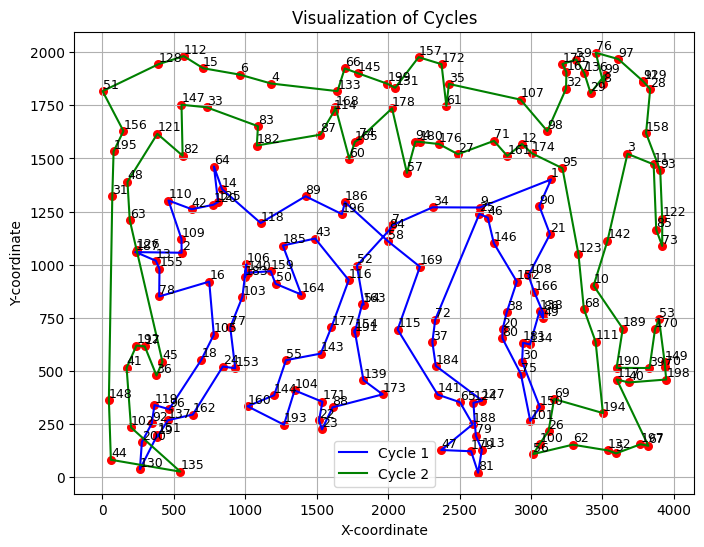

In [22]:
plot_cycles(cycle1, cycle2, data)